In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import folium
import plotly.express as px

In [2]:
import pyarrow.parquet as pq

In [2]:
vision_providers = pd.read_csv('../data/vision_providers_cleaned.csv')
vision_providers

,fid,NPI,Provider.Organization.Name..Legal.Business.Name.,Provider.Last.Name..Legal.Name.,Last.Update.Date,Provider.Gender.Code,Provider.License.Number_1,Healthcare.Provider.Taxonomy.Code_1,Is.Sole.Proprietor,Is.Organization.Subpart,Parent.Organization.LBN,Parent.Organization.TIN,Clean.Zip,Full.Address,Latitude,Longitude
0,1,1427051994,NaN,CHEN,7/8/2007,M,G077086,207W00000X,X,NaN,NaN,NaN,92705,1200 N TUSTIN AVE STE 140 SANTA ANA CA 92705,33.755588,-117.834918
1,2,1326041880,NaN,YOU,7/8/2007,M,G80625,207W00000X,X,NaN,NaN,NaN,92705,1200 N TUSTIN AVE STE 140 SANTA ANA CA 92705,33.755588,-117.834918
2,3,1770586232,NaN,ISAEFF,7/8/2007,M,G8927,207W00000X,N,NaN,NaN,NaN,92324,1880 E WASHINGTON ST COLTON CA 92324,34.047868,-117.295679
3,4,1548263007,NaN,VENDELAND,7/8/2007,M,35028411V,207W00000X,X,NaN,NaN,NaN,44118,5 SEVERANCE CIR STE 112 CLEVELAND HEIGHTS OH 4...,41.515893,-81.547908
4,5,1477556421,NaN,ROTH,7/8/2007,M,27OA00378500,152W00000X,Y,NaN,NaN,NaN,8051,1107 MANTUA PIKE STE 722 MANTUA NJ 08051,39.802445,-75.170818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141170,141171,1871712299,NaN,PHAM,5/6/2023,F,OD508,152W00000X,Y,NaN,NaN,NaN,96814,1450 ALA MOANA BLVD STE 3265 HONOLULU HI 96814,21.290275,-157.842192
141171,141172,1699236943,NaN,GILL,5/7/2023,M,NaN,390200000X,N,NaN,NaN,NaN,80045,13001 E 17TH PL AURORA CO 80045,39.745513,-104.837598
141172,141173,1487113486,NaN,PESKINA,5/7/2023,F,MD-51284,207W00000X,N,NaN,NaN,NaN,11040,614 INGRAHAM LN NEW HYDE PARK NY 11040,40.737496,-73.684833
141173,141174,1588216519,NaN,CHUNG,5/7/2023,F,OD60961378,152W00000X,Y,NaN,NaN,NaN,97209,1046 NW JOHNSON ST PORTLAND OR 97209,45.528501,-122.682146


In [6]:
# Create a map centered around the first location
# Convert 'NA' strings to actual NaN values
vision_providers['Latitude'] = vision_providers['Latitude'].replace('NA', np.nan)
vision_providers['Longitude'] = vision_providers['Longitude'].replace('NA', np.nan)

# Now drop the rows with NaN values
vision_providers = vision_providers.dropna(subset=['Latitude', 'Longitude'])

# You may also need to convert your 'latitude' and 'longitude' columns to float
vision_providers['Latitude'] = vision_providers['Latitude'].astype(float)
vision_providers['Longitude'] = vision_providers['Longitude'].astype(float)

vision_providers = vision_providers.sample(frac=0.1).reset_index()

m = folium.Map(location=[vision_providers['Latitude'][0], vision_providers['Longitude'][0]], zoom_start=5)

# Add markers for all places in the DataFrame
for index, row in vision_providers.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['fid']).add_to(m)

# Display the map
m


In [2]:
taxonomy_list = gpd.read_file('../data/Taxonomy_List.csv')
taxonomy_list

,MEDICARE SPECIALTY CODE,MEDICARE PROVIDER/SUPPLIER TYPE DESCRIPTION,PROVIDER TAXONOMY CODE,PROVIDER TAXONOMY DESCRIPTION: TYPE CLASSIFICATION SPECIALIZATION,geometry
0,1,Physician/General Practice,208D00000X,Allopathic & Osteopathic Physicians/General Pr...,None
1,2,Physician/General Surgery,208600000X,Allopathic & Osteopathic Physicians/Surgery,None
2,2,Physician/General Surgery,2086H0002X,Allopathic & Osteopathic Physicians/Surgery/Ho...,None
3,2,Physician/General Surgery,2086S0120X,Allopathic & Osteopathic Physicians/Surgery/Pe...,None
4,2,Physician/General Surgery,2086S0122X,Allopathic & Osteopathic Physicians/Surgery/Pl...,None
...,...,...,...,...,...
550,D4,Undersea and Hyperbaric Medicine,207PE0005X,Allopathic & Osteopathic Physicians/Undersea a...,None
551,D5,Opioid Treatment Program,261QR0405X,Ambulatory Health Care Facilities/Clinic/Cente...,None
552,D6,Home Infusion Therapy Services,3336H0001X,Suppliers Pharmacy Home Infusion Therapy Services,None
553,D7,Micrographic Dermatologic Surgery,207ND0101X,Allopathic & Osteopathic Physicians Dermatolog...,None


In [3]:
zcta = gpd.read_file("/srv/data/my_shared_data_folder/pb-data/zcta.gpkg")
zcta.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,STATEFP,TypeI,Geo_FIPS,Geo_QName,geometry
0,96799,96799,B5,G6350,S,197672934,1164505,-14.2231740,-169.5177430,11,3,NaN,96799,"MULTIPOLYGON (((-170.67152 -14.23885, -170.671..."
1,96770,96770,B5,G6350,S,177285639,33377439,+21.1336175,-157.2169319,11,3,96796770,96770,"MULTIPOLYGON (((-157.14885 21.09130, -157.1490..."
2,96769,96769,B5,G6350,S,193434451,44940998,+21.8958738,-160.1524561,11,3,96796769,96769,"MULTIPOLYGON (((-160.13518 21.94462, -160.1338..."
3,96752,96752,B5,G6350,S,10418464,1877589,+21.9709645,-159.7145071,11,3,96796752,96752,"MULTIPOLYGON (((-159.69767 21.95966, -159.6977..."
4,96796,96796,B5,G6350,S,119532951,11429247,+22.0940551,-159.7187487,11,3,96796796,96796,"MULTIPOLYGON (((-159.74093 22.10684, -159.7409..."


In [3]:
states = gpd.read_file("/srv/data/my_shared_data_folder/pb-data/states.gpkg")
states.head()

,REGION,DIVISION,Geo_FIPS,STATENS,GEOID,STUSPS,Geo_QNAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,9,0,60,01802701,60,AS,American Samoa,00,G4000,A,197759069,1307243751,-14.2671590,-170.6682674,"MULTIPOLYGON (((-168.14488 -14.54537, -168.144..."
1,4,9,15,01779782,15,HI,Hawaii,00,G4000,A,16634006436,11777792811,+19.5977643,-155.5024434,"MULTIPOLYGON (((-155.85049 20.26845, -155.8504..."
2,4,8,04,01779777,04,AZ,Arizona,00,G4000,A,294360282618,859561204,+34.2039355,-111.6063565,"MULTIPOLYGON (((-112.50381 31.78372, -112.5099..."
3,4,8,35,00897535,35,NM,New Mexico,00,G4000,A,314197253999,727781442,+34.4346843,-106.1316181,"MULTIPOLYGON (((-109.04894 31.96409, -109.0489..."
4,3,7,48,01779801,48,TX,Texas,00,G4000,A,676668210823,18991880422,+31.4347032,-099.2818238,"MULTIPOLYGON (((-101.25286 29.52050, -101.2535..."


In [4]:
county = gpd.read_file("/srv/data/my_shared_data_folder/pb-data/county.gpkg")
county.head()

,Remaining,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,...,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Remainin~1,ID~1,STATEFP~1,TypeI,geometry
0,0.157025,60,010,01805240,60010,Eastern,Eastern District,07,H1,G4020,...,A,65124866,349724678,-14.2681144,-170.6257058,3.247872e-06,28332,11,3,"MULTIPOLYGON (((-170.69943 -14.32473, -170.699..."
1,0.269258,60,050,01805241,60050,Western,Western District,07,H1,G4020,...,A,72498512,196726219,-14.3354680,-170.7842335,3.616445e-06,28332,11,3,"MULTIPOLYGON (((-170.77156 -14.36328, -170.771..."
2,0.110428,60,020,01805242,60020,Manu'a,Manu'a District,07,H1,G4020,...,A,57620993,464238044,-14.2196936,-169.5073268,2.871751e-06,28332,11,3,"MULTIPOLYGON (((-169.45345 -14.24806, -169.453..."
3,0.023642,60,040,01805244,60040,Swains Island,Swains Island,00,H4,G4020,...,N,2432605,149170816,-11.0544359,-171.0690136,1.743086e-07,28332,11,3,"MULTIPOLYGON (((-171.07193 -11.04807, -171.070..."
4,0.000557,60,030,01805243,60030,Rose Island,Rose Island,00,H4,G4020,...,N,82093,147383994,-14.5365298,-168.1512918,4.103100e-09,28332,11,3,"MULTIPOLYGON (((-168.14488 -14.54537, -168.144..."


(10.0, 80.0)

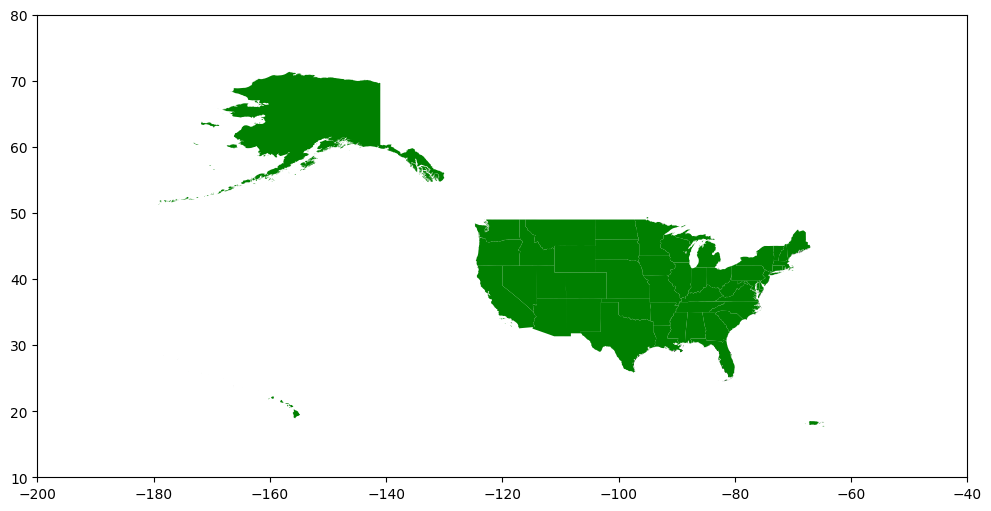

In [20]:
fig, ax = plt.subplots(1, figsize=(12, 12))
states.plot(ax = ax, color="g")


ax.set_xlim([-200, -40])
ax.set_ylim([10, 80])

(10.0, 80.0)

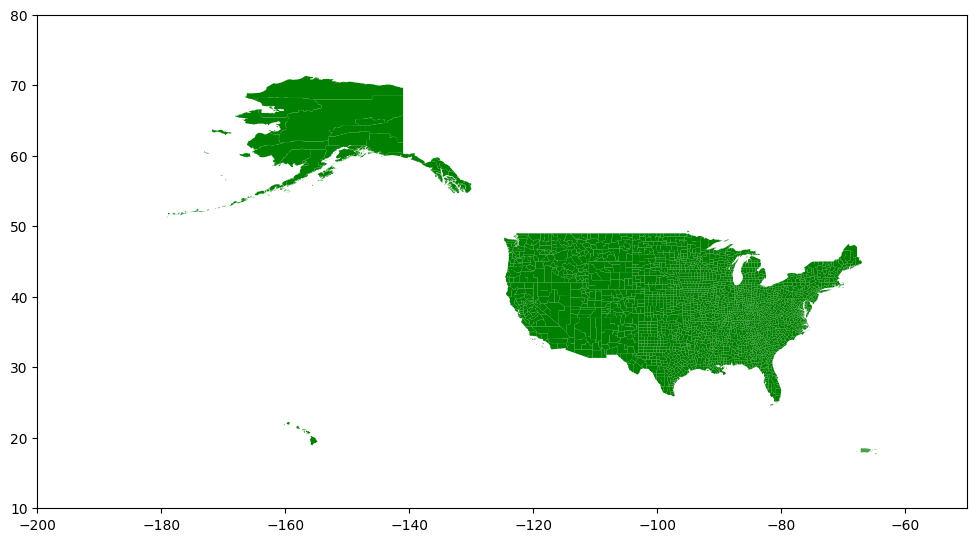

In [18]:
fig, ax = plt.subplots(1, figsize = (12, 12))
county.plot(ax = ax, color="g") 

ax.set_xlim([-200, -50])
ax.set_ylim([10, 80])

In [35]:
vision_providers_minimal = pq.read_table(source='../data/vision_providers_minimal.parquet').to_pandas()
vision_providers_minimal

,NPI,Entity Type Code,Replacement NPI,Employer Identification Number (EIN),Provider Organization Name (Legal Business Name),Provider Last Name (Legal Name),Provider First Name,Provider Middle Name,Provider Name Prefix Text,Provider Name Suffix Text,...,Authorized Official First Name,Authorized Official Middle Name,Authorized Official Title or Position,Authorized Official Telephone Number,Certification Date,Clean Zip,Full Address,Latitude,Longitude,Taxonomy
0,1427051994,1,NaN,None,None,CHEN,SANFORD,None,DR.,None,...,None,None,None,NaN,None,92705,1200 N TUSTIN AVE STE 140 SANTA ANA CA 92705,33.755588,-117.834918,207W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_
1,1326041880,1,NaN,None,None,YOU,TIMOTHY,T,DR.,None,...,None,None,None,NaN,None,92705,1200 N TUSTIN AVE STE 140 SANTA ANA CA 92705,33.755588,-117.834918,207W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_
2,1770586232,1,NaN,None,None,ISAEFF,WAYNE,B,None,None,...,None,None,None,NaN,None,92324,1880 E WASHINGTON ST COLTON CA 92324,34.047868,-117.295679,207W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_
3,1548263007,1,NaN,None,None,VENDELAND,JAMES,LEE,DR.,None,...,None,None,None,NaN,None,44118,5 SEVERANCE CIR STE 112 CLEVELAND HEIGHTS OH 4...,41.515893,-81.547908,207W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_
4,1477556421,1,NaN,None,None,ROTH,STEVEN,S.,DR.,None,...,None,None,None,NaN,None,08051,1107 MANTUA PIKE STE 722 MANTUA NJ 08051,39.802445,-75.170818,152W00000X|152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141170,1871712299,1,NaN,None,None,PHAM,TRINH,THUY,DR.,None,...,None,None,None,NaN,05/06/2023,96814,1450 ALA MOANA BLVD STE 3265 HONOLULU HI 96814,21.290275,-157.842192,152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_
141171,1699236943,1,NaN,None,None,GILL,ZAFAR,SINGH,None,None,...,None,None,None,NaN,05/07/2023,80045,13001 E 17TH PL AURORA CO 80045,39.745513,-104.837598,390200000X|207WX0107X|_|_|_|_|_|_|_|_|_|_|_|_|_
141172,1487113486,1,NaN,None,None,PESKINA,MARINA,None,None,None,...,None,None,None,NaN,05/07/2023,11040,614 INGRAHAM LN NEW HYDE PARK NY 11040,40.737496,-73.684833,207W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_
141173,1588216519,1,NaN,None,None,CHUNG,NELLIE,None,None,None,...,None,None,None,NaN,05/07/2023,97209,1046 NW JOHNSON ST PORTLAND OR 97209,45.528501,-122.682146,152W00000X|152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_


In [8]:
vision_providers_minimal.dropna(subset=['Certification Date'])

,NPI,Entity Type Code,Replacement NPI,Employer Identification Number (EIN),Provider Organization Name (Legal Business Name),Provider Last Name (Legal Name),Provider First Name,Provider Middle Name,Provider Name Prefix Text,Provider Name Suffix Text,...,Authorized Official First Name,Authorized Official Middle Name,Authorized Official Title or Position,Authorized Official Telephone Number,Certification Date,Clean Zip,Full Address,Latitude,Longitude,Taxonomy
97124,1295387926,1,NaN,None,None,IZAR,ASHLEY,DAWLI,DR.,None,...,None,None,None,NaN,12/07/2019,07430,29 GREAT HALL RD MAHWAH NJ 07430,41.066171,-74.194315,152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_
97125,1326684515,2,NaN,<UNAVAIL>,SPECS ON SITE,None,None,None,None,None,...,BRYAN,None,LICENSE OPTICIAN,3.479225e+09,12/08/2019,11222,252 JAVA ST STE 222 BROOKLYN NY 11222,40.731755,-73.949970,156FX1800X|_|_|_|_|_|_|_|_|_|_|_|_|_|_
97126,1699177840,1,NaN,None,None,MACIEJEWSKI,CAITLIN,None,None,None,...,None,None,None,NaN,12/08/2019,80905,530 COMMUNICATION CIR COLORADO SPRINGS CO 80905,38.826336,-104.843892,152W00000X|152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_
97127,1649406067,1,NaN,None,None,NGUYEN,THERESA,T,DR.,None,...,None,None,None,NaN,12/09/2019,63125,1 JEFFERSON BARRACKS DR SAINT LOUIS MO 63125,38.509500,-90.289547,152W00000X|152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_
97128,1730342767,1,NaN,None,None,BEYER,JILLIAN,L,DR.,None,...,None,None,None,NaN,12/09/2019,14075,50 BUFFALO ST. HAMBURG NY 14075,42.717365,-78.829707,152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141170,1871712299,1,NaN,None,None,PHAM,TRINH,THUY,DR.,None,...,None,None,None,NaN,05/06/2023,96814,1450 ALA MOANA BLVD STE 3265 HONOLULU HI 96814,21.290275,-157.842192,152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_
141171,1699236943,1,NaN,None,None,GILL,ZAFAR,SINGH,None,None,...,None,None,None,NaN,05/07/2023,80045,13001 E 17TH PL AURORA CO 80045,39.745513,-104.837598,390200000X|207WX0107X|_|_|_|_|_|_|_|_|_|_|_|_|_
141172,1487113486,1,NaN,None,None,PESKINA,MARINA,None,None,None,...,None,None,None,NaN,05/07/2023,11040,614 INGRAHAM LN NEW HYDE PARK NY 11040,40.737496,-73.684833,207W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_
141173,1588216519,1,NaN,None,None,CHUNG,NELLIE,None,None,None,...,None,None,None,NaN,05/07/2023,97209,1046 NW JOHNSON ST PORTLAND OR 97209,45.528501,-122.682146,152W00000X|152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_


In [10]:
for col in vision_providers_minimal.columns:
    print(col)

NPI
Entity Type Code
Replacement NPI
Employer Identification Number (EIN)
Provider Organization Name (Legal Business Name)
Provider Last Name (Legal Name)
Provider First Name
Provider Middle Name
Provider Name Prefix Text
Provider Name Suffix Text
Provider Credential Text
Provider Other Organization Name
Provider Other Organization Name Type Code
Provider Other Last Name
Provider Other First Name
Provider Other Middle Name
Provider Other Name Prefix Text
Provider Other Name Suffix Text
Provider Other Credential Text
Provider Other Last Name Type Code
Provider First Line Business Mailing Address
Provider Second Line Business Mailing Address
Provider Business Mailing Address City Name
Provider Business Mailing Address State Name
Provider Business Mailing Address Postal Code
Provider Business Mailing Address Country Code (If outside U.S.)
Provider Gender Code
Authorized Official Last Name
Authorized Official First Name
Authorized Official Middle Name
Authorized Official Title or Position


In [17]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(vision_providers_minimal.Longitude, vision_providers_minimal.Latitude)]
vision_providers_minimal = vision_providers_minimal.drop(['Longitude', 'Latitude'], axis=1)
gdf = GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

AttributeError: 'DataFrame' object has no attribute 'Longitude'

In [18]:
gdf

,NPI,Entity Type Code,Replacement NPI,Employer Identification Number (EIN),Provider Organization Name (Legal Business Name),Provider Last Name (Legal Name),Provider First Name,Provider Middle Name,Provider Name Prefix Text,Provider Name Suffix Text,...,Authorized Official Middle Name,Authorized Official Title or Position,Authorized Official Telephone Number,Certification Date,Clean Zip,Full Address,Latitude,Longitude,Taxonomy,geometry
0,1427051994,1,NaN,None,None,CHEN,SANFORD,None,DR.,None,...,None,None,NaN,None,92705,1200 N TUSTIN AVE STE 140 SANTA ANA CA 92705,33.755588,-117.834918,207W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,POINT (-117.83492 33.75559)
1,1326041880,1,NaN,None,None,YOU,TIMOTHY,T,DR.,None,...,None,None,NaN,None,92705,1200 N TUSTIN AVE STE 140 SANTA ANA CA 92705,33.755588,-117.834918,207W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,POINT (-117.83492 33.75559)
2,1770586232,1,NaN,None,None,ISAEFF,WAYNE,B,None,None,...,None,None,NaN,None,92324,1880 E WASHINGTON ST COLTON CA 92324,34.047868,-117.295679,207W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,POINT (-117.29568 34.04787)
3,1548263007,1,NaN,None,None,VENDELAND,JAMES,LEE,DR.,None,...,None,None,NaN,None,44118,5 SEVERANCE CIR STE 112 CLEVELAND HEIGHTS OH 4...,41.515893,-81.547908,207W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,POINT (-81.54791 41.51589)
4,1477556421,1,NaN,None,None,ROTH,STEVEN,S.,DR.,None,...,None,None,NaN,None,08051,1107 MANTUA PIKE STE 722 MANTUA NJ 08051,39.802445,-75.170818,152W00000X|152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_,POINT (-75.17082 39.80244)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141170,1871712299,1,NaN,None,None,PHAM,TRINH,THUY,DR.,None,...,None,None,NaN,05/06/2023,96814,1450 ALA MOANA BLVD STE 3265 HONOLULU HI 96814,21.290275,-157.842192,152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,POINT (-157.84219 21.29028)
141171,1699236943,1,NaN,None,None,GILL,ZAFAR,SINGH,None,None,...,None,None,NaN,05/07/2023,80045,13001 E 17TH PL AURORA CO 80045,39.745513,-104.837598,390200000X|207WX0107X|_|_|_|_|_|_|_|_|_|_|_|_|_,POINT (-104.83760 39.74551)
141172,1487113486,1,NaN,None,None,PESKINA,MARINA,None,None,None,...,None,None,NaN,05/07/2023,11040,614 INGRAHAM LN NEW HYDE PARK NY 11040,40.737496,-73.684833,207W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,POINT (-73.68483 40.73750)
141173,1588216519,1,NaN,None,None,CHUNG,NELLIE,None,None,None,...,None,None,NaN,05/07/2023,97209,1046 NW JOHNSON ST PORTLAND OR 97209,45.528501,-122.682146,152W00000X|152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_,POINT (-122.68215 45.52850)


In [38]:
vision_providers_minimal = vision_providers_minimal.dropna(subset=['Certification Date'])
vision_providers_minimal['Year'] = vision_providers_minimal['Certification Date'].apply(lambda x: x.split('/')[-1])
vision_providers_minimal

,NPI,Entity Type Code,Replacement NPI,Employer Identification Number (EIN),Provider Organization Name (Legal Business Name),Provider Last Name (Legal Name),Provider First Name,Provider Middle Name,Provider Name Prefix Text,Provider Name Suffix Text,...,Authorized Official Middle Name,Authorized Official Title or Position,Authorized Official Telephone Number,Certification Date,Clean Zip,Full Address,Latitude,Longitude,Taxonomy,Year
97124,1295387926,1,NaN,None,None,IZAR,ASHLEY,DAWLI,DR.,None,...,None,None,NaN,12/07/2019,07430,29 GREAT HALL RD MAHWAH NJ 07430,41.066171,-74.194315,152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,2019
97125,1326684515,2,NaN,<UNAVAIL>,SPECS ON SITE,None,None,None,None,None,...,None,LICENSE OPTICIAN,3.479225e+09,12/08/2019,11222,252 JAVA ST STE 222 BROOKLYN NY 11222,40.731755,-73.949970,156FX1800X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,2019
97126,1699177840,1,NaN,None,None,MACIEJEWSKI,CAITLIN,None,None,None,...,None,None,NaN,12/08/2019,80905,530 COMMUNICATION CIR COLORADO SPRINGS CO 80905,38.826336,-104.843892,152W00000X|152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_,2019
97127,1649406067,1,NaN,None,None,NGUYEN,THERESA,T,DR.,None,...,None,None,NaN,12/09/2019,63125,1 JEFFERSON BARRACKS DR SAINT LOUIS MO 63125,38.509500,-90.289547,152W00000X|152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_,2019
97128,1730342767,1,NaN,None,None,BEYER,JILLIAN,L,DR.,None,...,None,None,NaN,12/09/2019,14075,50 BUFFALO ST. HAMBURG NY 14075,42.717365,-78.829707,152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141170,1871712299,1,NaN,None,None,PHAM,TRINH,THUY,DR.,None,...,None,None,NaN,05/06/2023,96814,1450 ALA MOANA BLVD STE 3265 HONOLULU HI 96814,21.290275,-157.842192,152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,2023
141171,1699236943,1,NaN,None,None,GILL,ZAFAR,SINGH,None,None,...,None,None,NaN,05/07/2023,80045,13001 E 17TH PL AURORA CO 80045,39.745513,-104.837598,390200000X|207WX0107X|_|_|_|_|_|_|_|_|_|_|_|_|_,2023
141172,1487113486,1,NaN,None,None,PESKINA,MARINA,None,None,None,...,None,None,NaN,05/07/2023,11040,614 INGRAHAM LN NEW HYDE PARK NY 11040,40.737496,-73.684833,207W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,2023
141173,1588216519,1,NaN,None,None,CHUNG,NELLIE,None,None,None,...,None,None,NaN,05/07/2023,97209,1046 NW JOHNSON ST PORTLAND OR 97209,45.528501,-122.682146,152W00000X|152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_,2023


In [64]:
vision_providers_minimal = vision_providers_minimal.astype({'Year':'int'})

year_2020 = vision_providers_minimal[vision_providers_minimal['Year'] == 2020]
year_2020

,NPI,Entity Type Code,Replacement NPI,Employer Identification Number (EIN),Provider Organization Name (Legal Business Name),Provider Last Name (Legal Name),Provider First Name,Provider Middle Name,Provider Name Prefix Text,Provider Name Suffix Text,...,Authorized Official Middle Name,Authorized Official Title or Position,Authorized Official Telephone Number,Certification Date,Clean Zip,Full Address,Latitude,Longitude,Taxonomy,Year
97449,1952962763,2,NaN,<UNAVAIL>,"MARTELL EYECARE, LLC",None,None,None,None,None,...,None,OWNER,7.158701e+09,01/01/2020,54403,322 ROSS AVE WAUSAU WI 54403,44.935419,-89.621872,332H00000X|152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_,2020
97450,1093149494,1,NaN,None,None,DINH,NGHIEM,None,DR.,None,...,None,None,NaN,01/01/2020,98332,10990 HARBOR HILL DR GIG HARBOR WA 98332,47.357966,-122.603941,152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,2020
97451,1356814081,1,NaN,None,None,CHEEMA,EZAH,None,None,None,...,None,None,NaN,01/02/2020,43606,3405 W CENTRAL AVE TOLEDO OH 43606,41.676887,-83.626571,152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,2020
97452,1861841355,1,NaN,None,None,MURPHY,RACHEL,None,DR.,None,...,None,None,NaN,01/02/2020,97062,6455 SW NYBERG LN APT A207 TUALATIN OR 97062,45.384203,-122.743025,152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,2020
97453,1356629026,1,NaN,None,None,ABLOTT,ERIC,JAMES,None,None,...,None,None,NaN,01/02/2020,27317,200 W ACADEMY STREET RANDLEMAN NC 27317,35.818642,-79.807167,152W00000X|152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,1689614810,1,NaN,None,None,GREENSTEIN,JAY,S,None,None,...,None,None,NaN,01/31/2020,80219,417 S LOWELL BLVD DENVER CO 80219,39.708954,-105.035229,152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,2020
140718,1851338925,1,NaN,None,None,TAYLOR,MICHAEL,K,None,None,...,None,None,NaN,08/25/2020,83301,261 CANYON CREST DR STE 100 TWIN FALLS ID 83301,42.596399,-114.476377,207W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,2020
140765,1043605397,1,NaN,None,None,MIRI,SHAHNAZ,None,DR.,None,...,None,None,NaN,08/05/2020,94115,2186 GEARY BLVD STE 210 SAN FRANCISCO CA 94115,37.783699,-122.439293,207WX0109X|2084N0400X|_|_|_|_|_|_|_|_|_|_|_|_|_,2020
140935,1508184706,1,NaN,None,None,CHILDS,JOSEPH,HYRUM,DR.,None,...,None,None,NaN,04/27/2020,38804,3353 N GLOSTER ST TUPELO MS 38804,34.303524,-88.708273,207W00000X|207WX0009X|207W00000X|_|_|_|_|_|_|_...,2020


In [62]:
locs_gdf = gpd.GeoDataFrame(
    year_2020, geometry=gpd.points_from_xy(year_2020.Latitude, year_2020.Longitude),
    crs="EPSG:4326")
locs_gdf

,NPI,Entity Type Code,Replacement NPI,Employer Identification Number (EIN),Provider Organization Name (Legal Business Name),Provider Last Name (Legal Name),Provider First Name,Provider Middle Name,Provider Name Prefix Text,Provider Name Suffix Text,...,Authorized Official Title or Position,Authorized Official Telephone Number,Certification Date,Clean Zip,Full Address,Latitude,Longitude,Taxonomy,Year,geometry
97449,1952962763,2,NaN,<UNAVAIL>,"MARTELL EYECARE, LLC",None,None,None,None,None,...,OWNER,7.158701e+09,01/01/2020,54403,322 ROSS AVE WAUSAU WI 54403,44.935419,-89.621872,332H00000X|152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_,2020,POINT (44.93542 -89.62187)
97450,1093149494,1,NaN,None,None,DINH,NGHIEM,None,DR.,None,...,None,NaN,01/01/2020,98332,10990 HARBOR HILL DR GIG HARBOR WA 98332,47.357966,-122.603941,152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,2020,POINT (47.35797 -122.60394)
97451,1356814081,1,NaN,None,None,CHEEMA,EZAH,None,None,None,...,None,NaN,01/02/2020,43606,3405 W CENTRAL AVE TOLEDO OH 43606,41.676887,-83.626571,152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,2020,POINT (41.67689 -83.62657)
97452,1861841355,1,NaN,None,None,MURPHY,RACHEL,None,DR.,None,...,None,NaN,01/02/2020,97062,6455 SW NYBERG LN APT A207 TUALATIN OR 97062,45.384203,-122.743025,152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,2020,POINT (45.38420 -122.74303)
97453,1356629026,1,NaN,None,None,ABLOTT,ERIC,JAMES,None,None,...,None,NaN,01/02/2020,27317,200 W ACADEMY STREET RANDLEMAN NC 27317,35.818642,-79.807167,152W00000X|152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_,2020,POINT (35.81864 -79.80717)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,1689614810,1,NaN,None,None,GREENSTEIN,JAY,S,None,None,...,None,NaN,01/31/2020,80219,417 S LOWELL BLVD DENVER CO 80219,39.708954,-105.035229,152W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,2020,POINT (39.70895 -105.03523)
140718,1851338925,1,NaN,None,None,TAYLOR,MICHAEL,K,None,None,...,None,NaN,08/25/2020,83301,261 CANYON CREST DR STE 100 TWIN FALLS ID 83301,42.596399,-114.476377,207W00000X|_|_|_|_|_|_|_|_|_|_|_|_|_|_,2020,POINT (42.59640 -114.47638)
140765,1043605397,1,NaN,None,None,MIRI,SHAHNAZ,None,DR.,None,...,None,NaN,08/05/2020,94115,2186 GEARY BLVD STE 210 SAN FRANCISCO CA 94115,37.783699,-122.439293,207WX0109X|2084N0400X|_|_|_|_|_|_|_|_|_|_|_|_|_,2020,POINT (37.78370 -122.43929)
140935,1508184706,1,NaN,None,None,CHILDS,JOSEPH,HYRUM,DR.,None,...,None,NaN,04/27/2020,38804,3353 N GLOSTER ST TUPELO MS 38804,34.303524,-88.708273,207W00000X|207WX0009X|207W00000X|_|_|_|_|_|_|_...,2020,POINT (34.30352 -88.70827)


In [69]:
year_2020_counted = year_2020.groupby("Provider Business Mailing Address State Name").size().reset_index().rename(columns={0: 'count'})
year_2020_counted

,Provider Business Mailing Address State Name,count
0,AE,2
1,AK,16
2,AL,128
3,ALBERTA,1
4,AP,3
...,...,...
59,VT,20
60,WA,195
61,WI,186
62,WV,41


In [59]:
states = gpd.read_file("/srv/data/my_shared_data_folder/pb-data/states.gpkg")
states.head()

,REGION,DIVISION,Geo_FIPS,STATENS,GEOID,STUSPS,Geo_QNAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,9,0,60,01802701,60,AS,American Samoa,00,G4000,A,197759069,1307243751,-14.2671590,-170.6682674,"MULTIPOLYGON (((-168.14488 -14.54537, -168.144..."
1,4,9,15,01779782,15,HI,Hawaii,00,G4000,A,16634006436,11777792811,+19.5977643,-155.5024434,"MULTIPOLYGON (((-155.85049 20.26845, -155.8504..."
2,4,8,04,01779777,04,AZ,Arizona,00,G4000,A,294360282618,859561204,+34.2039355,-111.6063565,"MULTIPOLYGON (((-112.50381 31.78372, -112.5099..."
3,4,8,35,00897535,35,NM,New Mexico,00,G4000,A,314197253999,727781442,+34.4346843,-106.1316181,"MULTIPOLYGON (((-109.04894 31.96409, -109.0489..."
4,3,7,48,01779801,48,TX,Texas,00,G4000,A,676668210823,18991880422,+31.4347032,-099.2818238,"MULTIPOLYGON (((-101.25286 29.52050, -101.2535..."


In [61]:
gdf = gdf.sample(frac=0.1).reset_index(drop=True)


m1 = folium.Map(location=[40, -95], zoom_start=4)

folium.Choropleth(
    geo_data=locs_gdf,
    name="choropleth",
    data=year_2020_counted,
    columns=["NPI"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Unemployment Rate (%)",
).add_to(m1)

folium.LayerControl().add_to(m1)

m1

IndexError: list index out of range